# 특성 공학과 규제
#### 핵심 키워드: 다중 회귀, 특성 공학, 릿지, 라쏘, 하이퍼파라미터

* 여러 개의 특성을 사용한 선형 회귀를 다중 회귀(multiple regression)라고 부른다.
* 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 특성 공학(feature engineering)이라고 부른다.

In [1]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [2]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [6]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [9]:
train_input.shape

(42, 3)

In [11]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [12]:
test_poly = poly.transform(test_input)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [14]:
print(lr.score(train_poly, train_target))

0.9903183436982125


In [15]:
print(lr.score(test_poly, test_target))

0.9714559911594155


In [16]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [17]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [18]:
print(lr.score(test_poly, test_target))

-144.40744532797535


* **규제**(regularization)는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 즉 모델이 훈련 세트에 과대적합되지 않도록 만드는 것이다. 

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

* 선형 회귀 모델에 규제를 추가한 모델을 **릿지**(ridge)와 **라쏘**(lasso)라고 부른다. 릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고, 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.
일반적으로 릿지를 조금 더 선호한다고 한다. 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있다.

In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [21]:
print(ridge.score(test_scaled, test_target))

0.979069397761539


* 릿지 모델에서 alpha 값을 조정하면 규제의 강도를 조절할 수 있다. alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다. alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.

* alpha 값처럼 모델이 학습하는게 아니라 사전에 사람이 직접 지정하는 값을 **하이퍼파라미터**(hyperparameter)라고 부른다. 사이킷런과 같은 머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현된다. 이 책에서는 함수와 클래스의 파라미터는 매개변수라고 하고 모델과 관련된 파라미터(모델 파라미터, 하이터파라미터)는 그대로 파라미터라고 표현했다.

In [22]:
# 적절한 alpha 값을 찾는 방법 => R^2 값의 그래프를 그려보는것
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [23]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

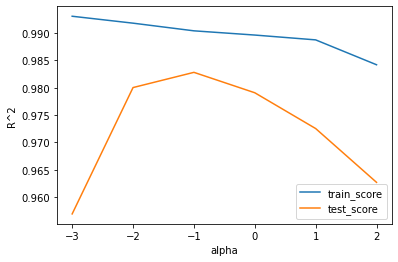

In [26]:
plt.plot(np.log10(alpha_list), train_score, label='train_score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [27]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386954


In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [29]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [30]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만든다.
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련한다.
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장한다.
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\Users\sanghui\miniconda3\envs\hongong\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\sanghui\miniconda3\envs\hongong\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


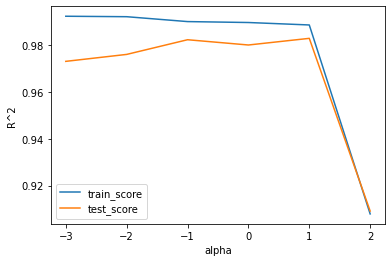

In [32]:
plt.plot(np.log10(alpha_list), train_score, label='train_score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [33]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [34]:
print(np.sum(lasso.coef_ == 0))

40


* **다중 회귀**는 여러 개의 특성을 사용하는 회귀 모델이다. 특성이 많으면 선형 모델은 강력한 성능을 발휘한다.
* **특성 공학**은 주어진 특성을 조합하여 새로운 특성을 만드는 일련의 작업 과정이다.
* **릿지**는 규제가 있는 선형 회귀 모델 중 하나이다. 선형 모델의 계수를 작게 만들어 과대적합을 완화시킨다. 릿지는 비교적 효과가 좋아 널리 사용하는 규제 방법이다.
* **라쏘**는 또 다른 규제가 있는 선형 회귀 모델이다. 릿지와 달리 계수 값을 아예 0으로 만들 수도 있다.
* **하이퍼파라미터**는 머신러닝 알고리즘이 학습하지 않는 파라미터다. 이런 파라미터는 사람이 사전에 지정해야 한다. 대표적으로 릿지와 라쏘의 규제 강도 alpha 파라미터이다.